# **Barcode Generation and Reading**

In [1]:
!pip install python-barcode[images]
!pip install qrcode
!apt install libzbar0
!pip install pyzbar

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 918.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 2.8 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libv4l-0 libv4lconvert0 libwmflite-0.2-7 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x libfftw3-bin
  libfftw3-dev inkscape poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-got

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

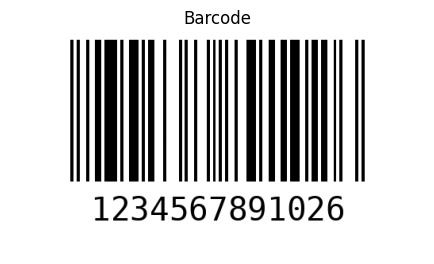

In [3]:
from barcode import EAN13
from barcode.writer import ImageWriter

with open('barcode.png', 'wb') as f:
  EAN13('123456789102', writer=ImageWriter()).write(f)
barcode = cv2.imread("barcode.png")
imshow("Barcode", barcode)

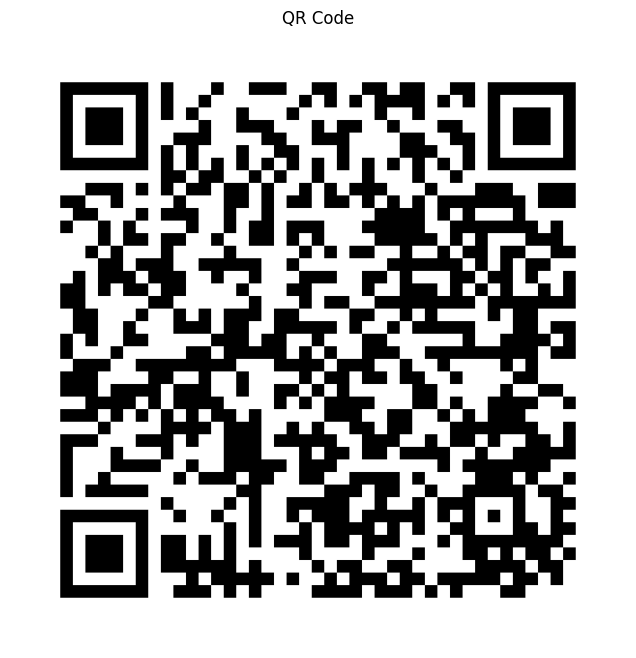

In [4]:
## QR code
import qrcode
from PIL import Image

qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=10,
    border=4,
)

qr.add_data("https://github.com/mirsaidl/ComputerVision_OpenCV")
qr.make(fit=True)
img = qr.make_image(fill_color="black", back_color="white")
img.save("github_vision_qrcode.png")

qrcode = cv2.imread("github_vision_qrcode.png")
imshow("QR Code", qrcode, size=8)

**Configuartion for QR Codes**:

- version — Control the size of the QR Code. It accepts an integer from 1 to 40. Version 1 consists of 21 x 21 matrix.
- error_correction — Control the error correction used for the QR Code.
- box_size — Control the number of pixels of each boxes of the QR code.
- border — Control the boxes thickness of the border. The default is value is 4 which is also the minimum value according to the specification.

There are 4 constants available for error_correction. The higher errors can be corrected, the better it is.

- ERROR_CORRECT_L — About 7% or less errors can be corrected.
- ERROR_CORRECT_M — About 15% or less errors can be corrected. This is the default value.
- ERROR_CORRECT_Q — About 25% or less errors can be corrected.
- ERROR_CORRECT_H — About 30% or less errors can be corrected.

In [5]:
# Decode QR Code
from pyzbar.pyzbar import decode
from PIL import Image

img = Image.open('github_vision_qrcode.png')
result = decode(img)
for i in result:
    print(i.data.decode("utf-8"))

https://github.com/mirsaidl/ComputerVision_OpenCV


### **Detecting QR codes**

[Point(x=558, y=938), Point(x=588, y=1288), Point(x=916, y=1275), Point(x=875, y=896)]
QR Code revealed: http://ruthenus.pl (QRCODE)


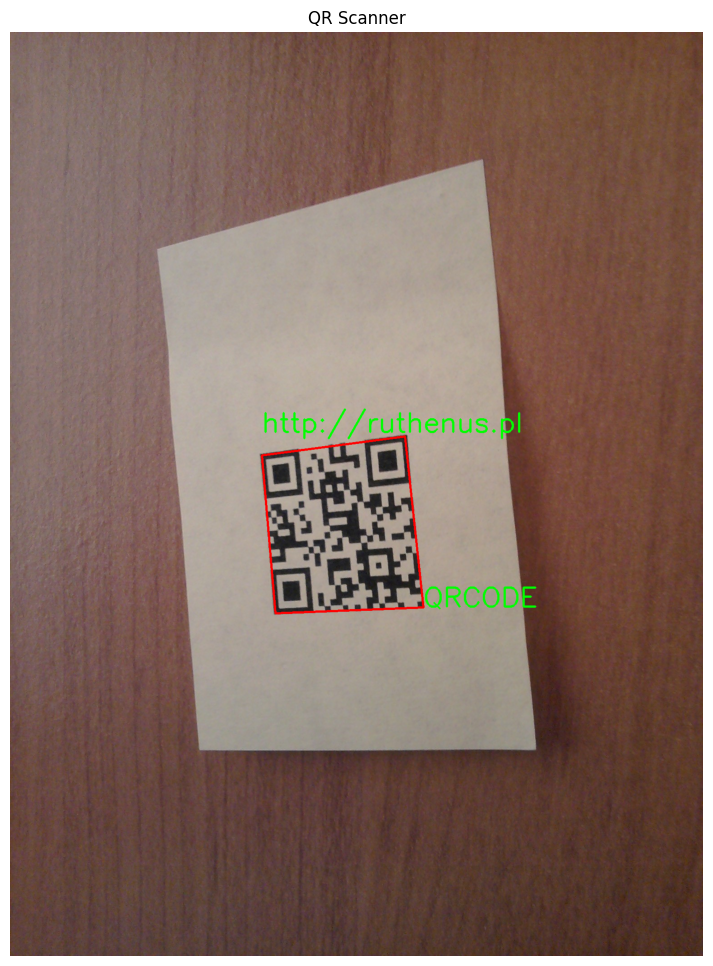

In [7]:
from pyzbar.pyzbar import decode

image = cv2.imread("1DwED.jpg")

# Detect and decode the qrcode
codes = decode(image)

# loop over the detected barcodes
for bc in codes:
  # Get the rect coordiantes for our text placement
  (x, y, w, h) = bc.rect
  print(bc.polygon)
  pt1,pt2,pt3,pt4 = bc.polygon

  # Draw a bounding box over our detected QR code
  pts = np.array( [[pt1.x,pt1.y], [pt2.x,pt2.y], [pt3.x,pt3.y], [pt4.x,pt4.y]], np.int32)
  pts = pts.reshape((-1,1,2))
  cv2.polylines(image, [pts], True, (0,0,255), 3)

  # extract the string info data and the type from our object
  barcode_text = bc.data.decode()
  barcode_type = bc.type

  # show our
  text = "{} ({})".format(barcode_text, barcode_type)
  cv2.putText(image, barcode_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  cv2.putText(image, barcode_type, (x+w, y+h - 15), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  print("QR Code revealed: {}".format(text))

# display our output
imshow("QR Detector", image, size = 12)